In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/movie.csv")
df.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [3]:
df.shape

(40000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


Text(0.5, 1.0, 'Label distribution')

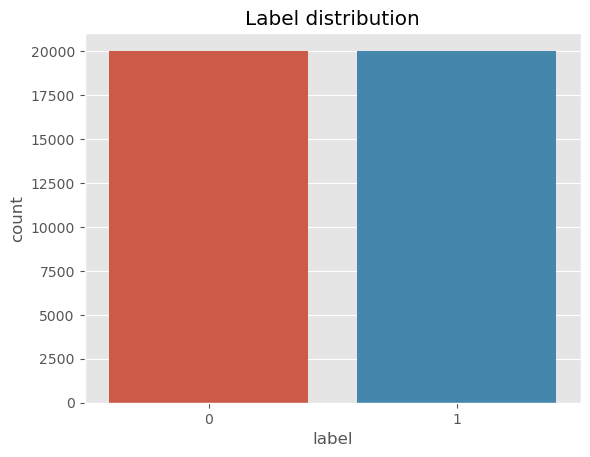

In [5]:
sns.countplot(x='label', data=df)
plt.title("Label distribution")

In [6]:
for i in range(5):
    print("Text: ", [i])
    print(df['text'].iloc[i], "\n")
    print("Label: ", df['label'].iloc[i], "\n\n")

Text:  [0]
I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment. 

Label:  0 


Text:  [1]
When I put this movie in my DVD player, and sat down with a coke and some chips, I had s

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['text'].apply(no_of_words)

In [9]:
df.head()

text  label  word count
0  I grew up (b. 1965) watching and loving the Th...      0         151
1  When I put this movie in my DVD player, and sa...      0         326
2  Why do people who do not know what a particula...      0         184
3  Even though I have great interest in Biblical ...      0          69
4  Im a die hard Dads Army fan and nothing will e...      1         178

In [10]:
df.label.replace("positive", 1, inplace=True)
df.label.replace("negative", 0, inplace=True)

In [11]:
df.head()

text  label  word count
0  I grew up (b. 1965) watching and loving the Th...      0         151
1  When I put this movie in my DVD player, and sa...      0         326
2  Why do people who do not know what a particula...      0         184
3  Even though I have great interest in Biblical ...      0          69
4  Im a die hard Dads Army fan and nothing will e...      1         178

In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
df.text = df['text'].apply(data_processing)

In [14]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  279


In [15]:
df = df.drop_duplicates('text')

In [16]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [17]:
df.text = df['text'].apply(lambda x: stemming(x))

In [18]:
df['word count'] = df['text'].apply(no_of_words)
df.head()

text  label  word count
0  grew b 1965 watching loving thunderbirds mates...      0          87
1  put movie dvd player sat coke chips expectatio...      0         155
2  people know particular time past like feel nee...      0          99
3  even though great interest biblical movies bor...      0          33
4  im die hard dads army fan nothing ever change ...      1         102

In [19]:
pos_text = df[df.label ==1]
pos_text.head()

text  label  word count
4   im die hard dads army fan nothing ever change ...      1         102
6   finally watched shocking movie last night dist...      1         121
8   may remake 1987 autumns tale eleven years dire...      1         108
9   super ex girlfriend turned pleasant surprise r...      1         138
10  cant believe people looking plot film laural h...      1          65

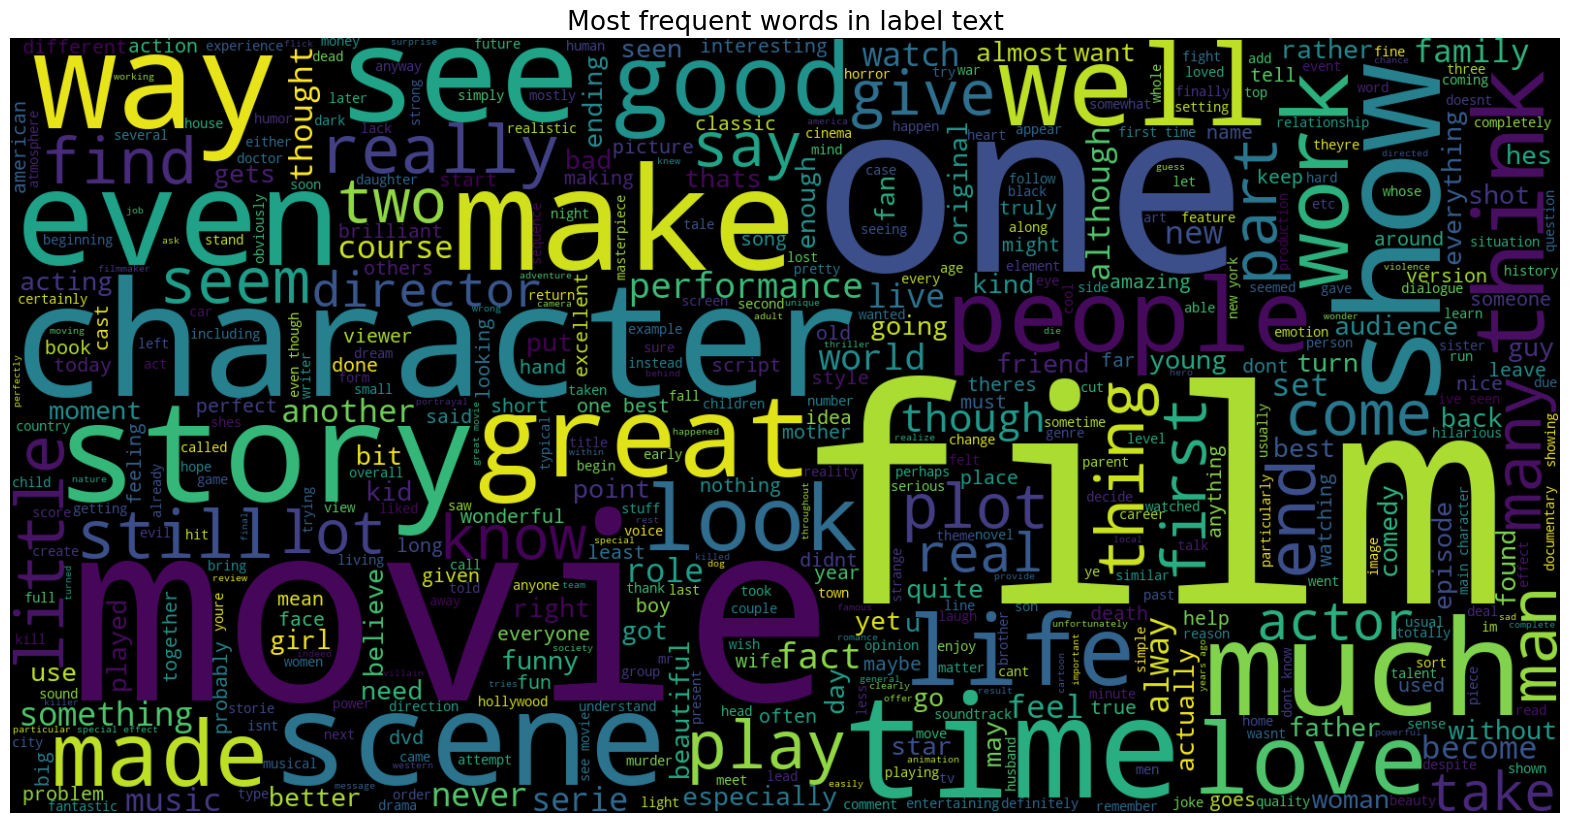

In [20]:
text = ' '.join([word for word in pos_text['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in label text', fontsize = 19)
plt.show()

In [21]:
from collections import Counter
count = Counter()
for text in pos_text['text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 31315),
 ('movie', 28806),
 ('one', 20547),
 ('like', 13728),
 ('good', 11456),
 ('great', 10055),
 ('story', 9863),
 ('see', 9469),
 ('time', 9376),
 ('well', 8756),
 ('really', 8584),
 ('also', 8561),
 ('would', 8285),
 ('even', 7504),
 ('much', 7177)]

In [22]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  31315
1  movie  28806
2    one  20547
3   like  13728
4   good  11456

In [23]:
px.bar(pos_words, x='count', y='word', title='Common words in label text', color='word')

In [24]:
neg_text = df[df.label == 0]
neg_text.head()

text  label  word count
0  grew b 1965 watching loving thunderbirds mates...      0          87
1  put movie dvd player sat coke chips expectatio...      0         155
2  people know particular time past like feel nee...      0          99
3  even though great interest biblical movies bor...      0          33
5  terrible movie everyone said made laugh cameo ...      0          55

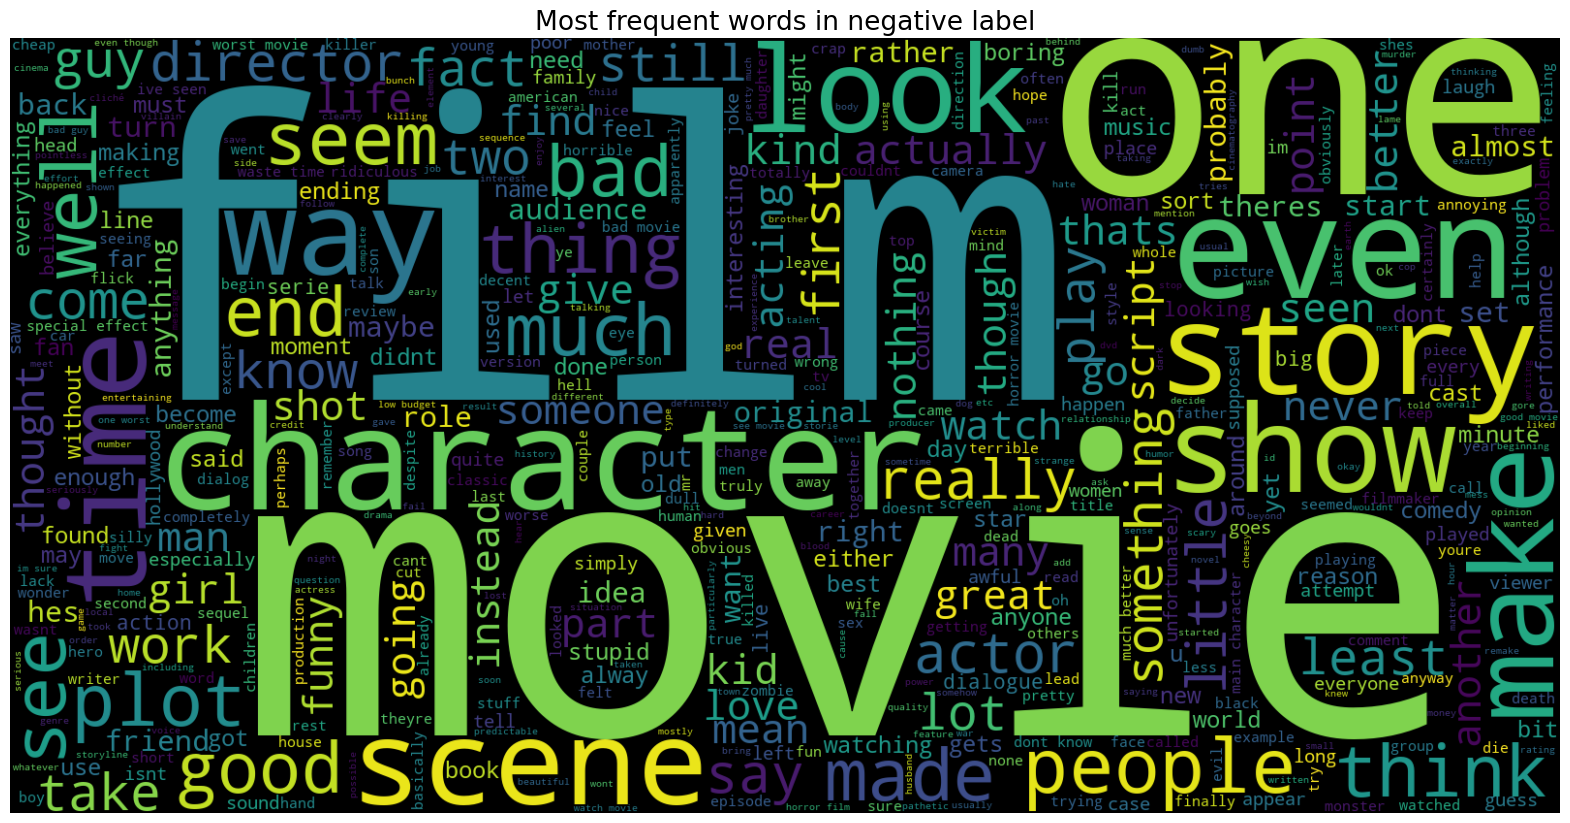

In [25]:
text = ' '.join([word for word in neg_text['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative label', fontsize = 19)
plt.show()

In [26]:
count = Counter()
for text in neg_text['text'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 37686),
 ('film', 27803),
 ('one', 19516),
 ('like', 17253),
 ('even', 11841),
 ('good', 11319),
 ('bad', 11105),
 ('would', 10777),
 ('really', 9702),
 ('time', 9155),
 ('see', 8312),
 ('dont', 7935),
 ('get', 7930),
 ('much', 7826),
 ('story', 7662)]

In [27]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  37686
1   film  27803
2    one  19516
3   like  17253
4   even  11841

In [28]:
px.bar(neg_words, x='count', y='word', title='Common words in text lable', color='word')

In [29]:
X = df['text']
Y = df['label']

In [30]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['text'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [32]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (27804, 192344)
Size of y_train:  (27804,)
Size of x_test:  (11916, 192344)
Size of y_test:  (11916,)


In [33]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [34]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 192344)
Size of y_train:  (2000,)
Size of x_test:  (500, 192344)
Size of y_test:  (500,)


In [35]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 12s 52ms/step - loss: 0.6496 - accuracy: 0.6830
Epoch 2/15
200/200 [==============================] - 10s 50ms/step - loss: 0.4075 - accuracy: 0.9315
Epoch 3/15
200/200 [==============================] - 10s 49ms/step - loss: 0.1773 - accuracy: 0.9675
Epoch 4/15
200/200 [==============================] - 10s 49ms/step - loss: 0.0759 - accuracy: 0.9820
Epoch 5/15
200/200 [==============================] - 10s 49ms/step - loss: 0.0348 - accuracy: 0.9920
Epoch 6/15
200/200 [==============================] - 10s 50ms/step - loss: 0.0170 - accuracy: 0.9975
Epoch 7/15
200/200 [==============================] - 10s 49ms/step - loss: 0.0085 - accuracy: 0.9980
Epoch 8/15
200/200 [==============================] - 10s 49ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 9/15
200/200 [==============================] - 10s 50ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/15
200/200 [==============================] - 10s 51ms/step - loss: 6.545

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3077520   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,077,665
Trainable params: 3,077,665
Non-trainable params: 0
_________________________________________________________________


In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 15ms/step - loss: 0.6924 - accuracy: 0.8360
Test loss: 0.6924107074737549
Test accuracy: 0.8360000252723694


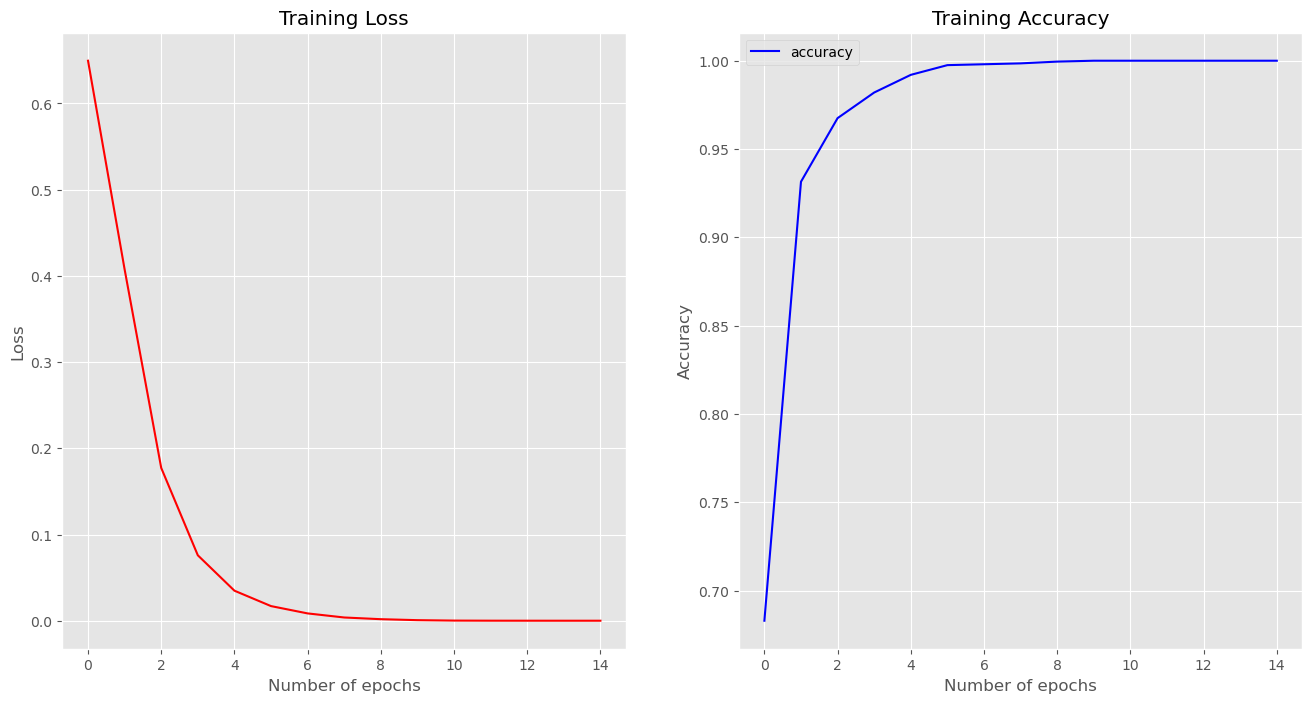

In [42]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 9s 39ms/step - loss: 0.6576 - accuracy: 0.6085
Epoch 2/15
200/200 [==============================] - 6s 29ms/step - loss: 0.3792 - accuracy: 0.9210
Epoch 3/15
200/200 [==============================] - 5s 26ms/step - loss: 0.1014 - accuracy: 0.9960
Epoch 4/15
200/200 [==============================] - 5s 26ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 5/15
200/200 [==============================] - 5s 26ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 6/15
200/200 [==============================] - 6s 32ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 7/15
200/200 [==============================] - 5s 27ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/15
200/200 [==============================] - 5s 27ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/15
200/200 [==============================] - 6s 28ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0011 - accura

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                3077520   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,077,665
Trainable params: 3,077,665
Non-trainable params: 0
_________________________________________________________________


In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 0s 14ms/step - loss: 0.3815 - accuracy: 0.8480
Test loss: 0.3814942538738251
Test accuracy: 0.8479999899864197


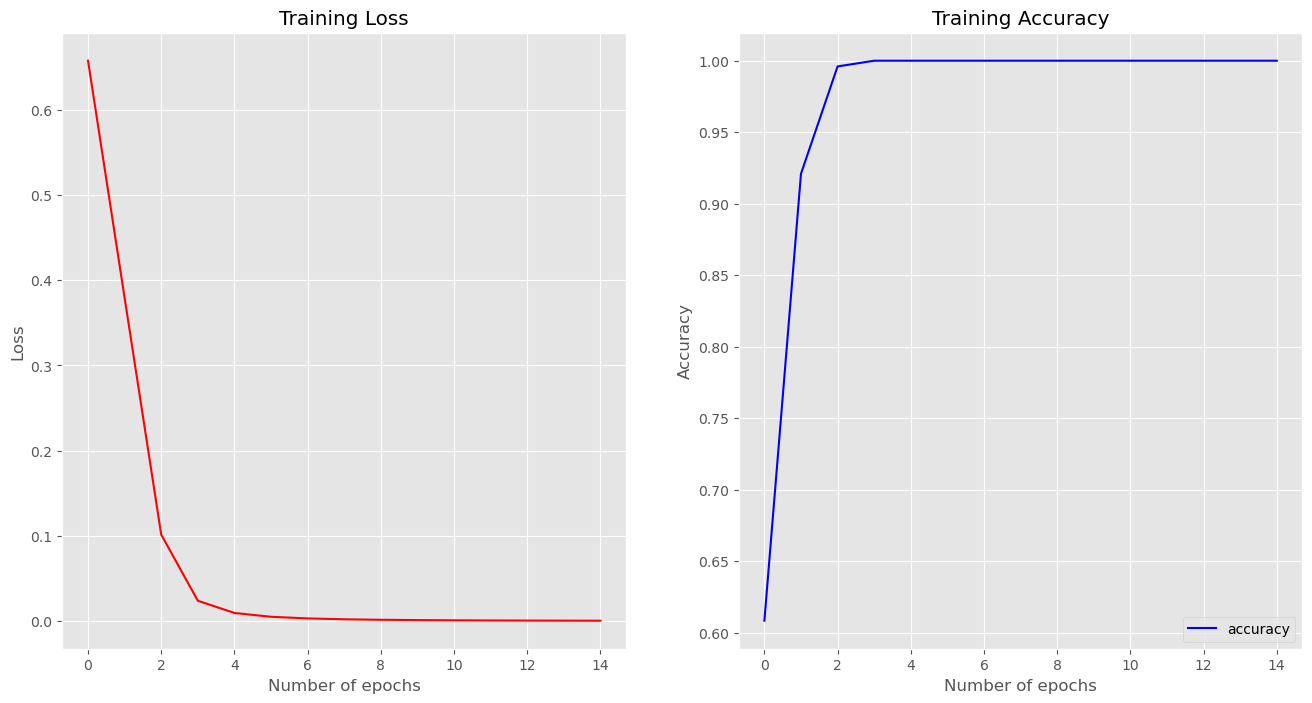

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()